# **Abstract**

El presente proyecto se enmarca en el análisis exploratorio de datos (EDA) utilizando un dataset sobre calidad de vinos rojos, conocido como “Wine Quality Dataset”. Este conjunto de datos proviene de estudios realizados para modelar la calidad del vino en función de diversas propiedades físico-químicas, como el contenido de alcohol, el pH, la acidez volátil, el dióxido de azufre y otros parámetros químicos. El dataset cuenta con más de 1000 entradas y 13 variables, incluyendo una variable objetivo categórica llamada quality, que indica el nivel de calidad percibida del vino en una escala del 0 al 10.

El objetivo principal de este trabajo es explorar las relaciones entre las distintas variables que componen el dataset y evaluar cuáles de ellas tienen mayor impacto en la calidad del vino. A partir de este análisis, se busca formular hipótesis y responder preguntas orientadas a identificar los factores que podrían predecir la calidad de un vino de forma objetiva. Se utilizarán herramientas de visualización univariada, bivariada y multivariada, acompañadas de resúmenes estadísticos descriptivos para obtener insights relevantes. También se evaluará la presencia de valores perdidos y su posible tratamiento.

Este tipo de análisis resulta de gran utilidad en la industria vitivinícola, donde la evaluación sensorial suele tener un alto componente subjetivo. La posibilidad de modelar la calidad del producto a partir de **variables** medibles aporta valor tanto en procesos de control de calidad como en decisiones de producción y mejora de productos. Si bien este trabajo no incluye modelos predictivos en esta etapa, sentará las bases para futuras investigaciones con enfoques de Machine Learning.

En resumen, se busca comprender qué patrones subyacen en la composición química del vino y cómo estos se asocian con la percepción de calidad, brindando una mirada analítica que combine ciencia de datos con enología.

## Diccionario de variables

A continuación se describen las variables incluidas en el dataset:

- `fixed acidity`: cantidad de ácidos no volátiles presentes en el vino (tartárico, málico).
- `volatile acidity`: cantidad de ácidos volátiles, principalmente ácido acético; en exceso puede afectar negativamente el aroma.
- `citric acid`: ácido cítrico, aporta frescura al vino.
- `residual sugar`: cantidad de azúcar que queda después de la fermentación.
- `chlorides`: contenido de cloruros (sal), en grandes cantidades afecta el sabor.
- `free sulfur dioxide`: cantidad de SO₂ libre, útil para prevenir la oxidación microbiana.
- `total sulfur dioxide`: SO₂ total presente (libre y combinado).
- `density`: densidad del vino, relacionada con el contenido de azúcar y alcohol.
- `pH`: nivel de acidez; valores bajos indican mayor acidez.
- `sulphates`: compuestos que contribuyen al sabor y conservación del vino.
- `alcohol`: contenido de alcohol (%).
- `quality`: puntuación de calidad del vino dada por expertos (de 0 a 10) según catas sensoriales, teniendo en cuenta factores como el sabor, aroma, cuerpo, persistencia y equilibrio general del vino.
- `Id`: identificador único de cada observación (no relevante para el análisis).


In [1]:
#Importamos el dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importamos las librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp

#Leemos el dataset

# Ruta al archivo Google Drive
ruta = '/content/drive/MyDrive/Colab Notebooks/dataframes/WineQT.csv'

# Cargamos el CSV en el DataFrame
df = pd.read_csv(ruta)

# Vemos las filas del dataset
df.head(13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [3]:
#Mostrar valores nulos

print('Valores nulos del conjunto de datos')
print(pd.isnull(df).sum())

Valores nulos del conjunto de datos
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


## Análisis Exploratorio de Datos

En esta sección se llevará a cabo una exploración inicial del dataset con el objetivo de conocer el comportamiento de las variables, identificar posibles valores atípicos y establecer relaciones que puedan sustentar futuras hipótesis.

Se analizarán distribuciones, estadísticas descriptivas y patrones entre variables físico-químicas del vino, prestando especial atención a aquellas que podrían tener una relación directa con la calidad (`quality`). También se evaluará la presencia de valores perdidos y se justificará el tratamiento aplicado.

Este análisis será clave para definir preguntas de interés que permitan orientar el trabajo analítico hacia conclusiones relevantes en términos de percepción sensorial y propiedades del producto.


In [4]:
#Obtenemos un resumen estadístico de las variables numéricas del dataset.

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Análisis de valores atípicos

Para evaluar la presencia de valores extremos que pudieran distorsionar los análisis posteriores, se graficaron boxplots de algunas variables clave. Se observan valores atípicos principalmente en las variables `total sulfur dioxide`, `residual sugar`, `volatile acidity` y `chlorides`, lo cual es esperable en un dataset químico, donde pequeñas proporciones pueden tener un gran impacto.

En principio, se conservarán los outliers ya que no parecen errores de carga, sino variabilidad propia del producto. No obstante, se tendrá en cuenta su presencia al momento de interpretar gráficos y tendencias.



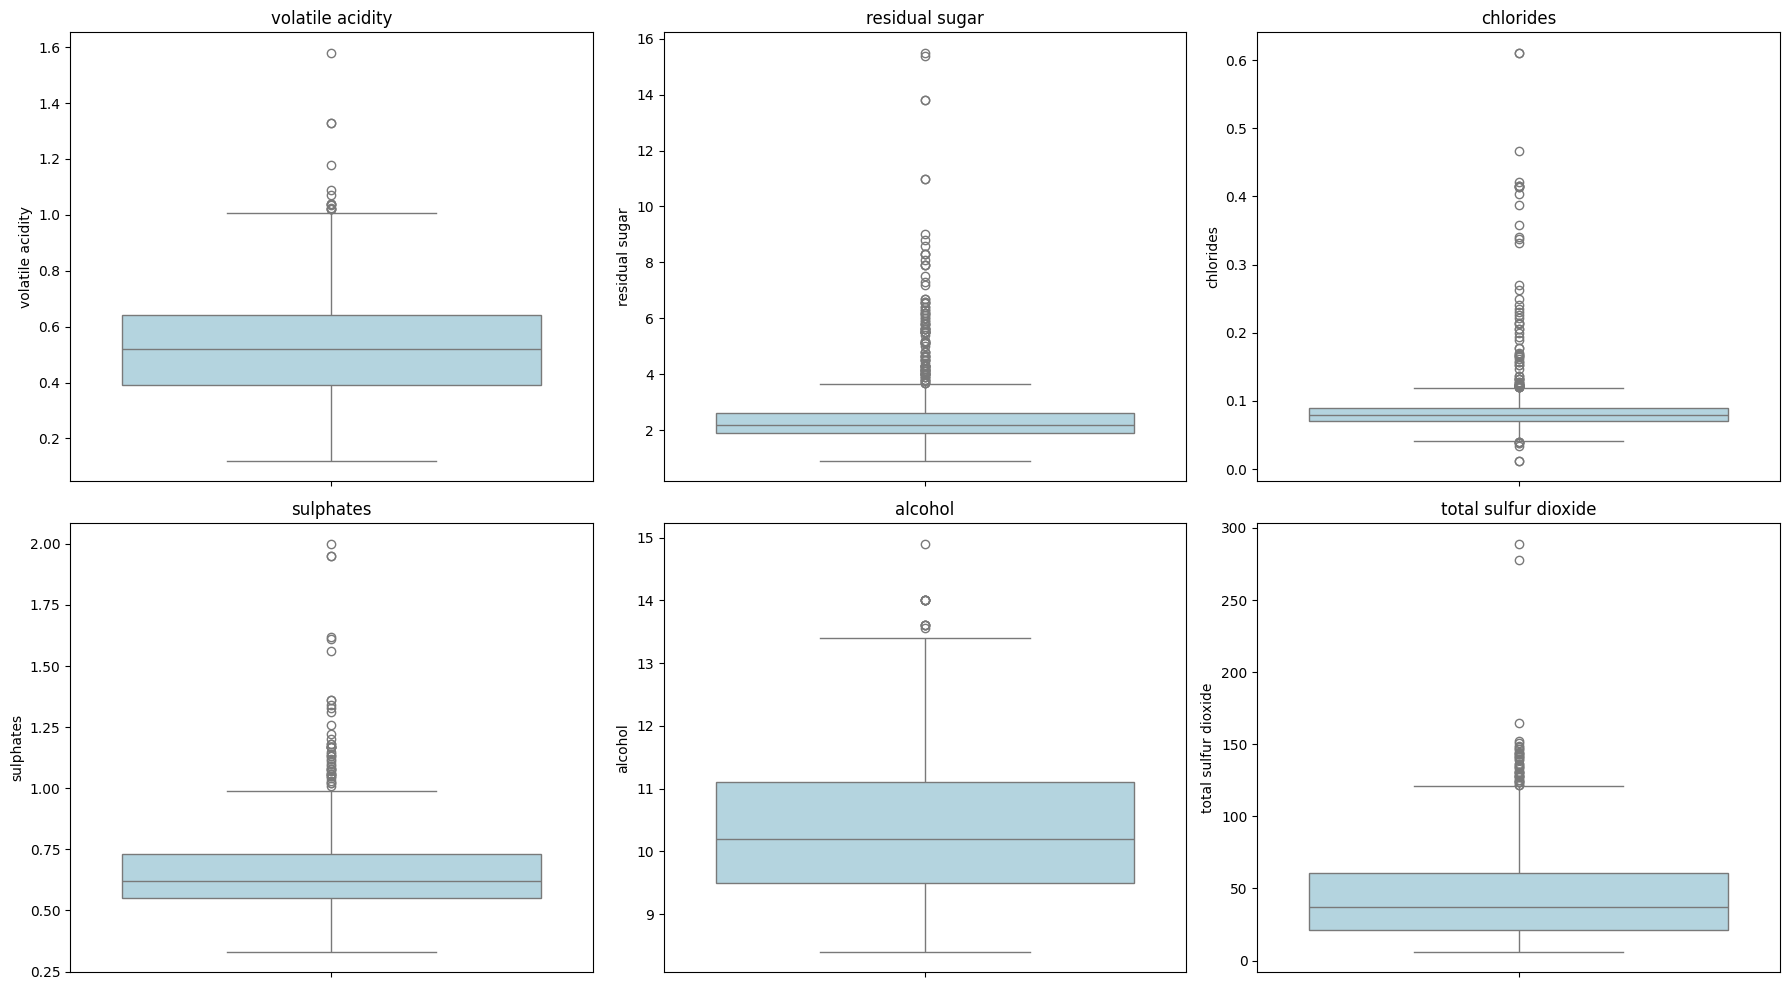

In [6]:
# Variables candidatas a outliers
columnas = ['volatile acidity', 'residual sugar', 'chlorides',
            'sulphates', 'alcohol', 'total sulfur dioxide']

# Gráficos
plt.figure(figsize=(18, 10))
for i, col in enumerate(columnas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col}')
    plt.tight_layout()

Al obtener los boxplots correspondientes, se observaron outliers relevantes en variables clave del dataset:

- `volatile acidity` y `residual sugar` presentan valores extremos hacia arriba, lo que podría indicar vinos con perfiles inusuales, más ácidos o más dulces, respectivamente.
- `chlorides` y `sulphates` también muestran dispersión, aunque en menor escala.
- En `alcohol`, la distribución es más homogénea, lo cual facilita su análisis respecto a la calidad.
- Finalmente, `total sulfur dioxide` exhibe varios outliers, especialmente valores que superan ampliamente los 200, lo cual podría afectar tanto la estabilidad del vino como su perfil organoléptico.

Dado que los valores atípicos observados representan fenómenos posibles dentro del rango de producción vitivinícola (como vinos más alcohólicos, dulces o con más conservantes), se decidió **mantenerlos en el análisis**. No se identificaron errores evidentes de carga.

No obstante, en los gráficos se tendrá especial cuidado en cómo estos outliers podrían afectar la interpretación (por ejemplo, mediante escalas recortadas o transformaciones), con el objetivo de evitar conclusiones sesgadas por pocos casos extremos.



# Preguntas e hipótesis de interés

1. **Hipótesis 1:** “Los vinos con mayor contenido de alcohol tienden a tener una mejor calidad.”  
2. **Hipótesis 2:** “Los vinos con menor acidez volátil tienden a tener mejor calidad.”  
3. **Hipótesis 3:** “Los vinos con más sulfitos tienden a tener una calidad media o baja.”  
4. **Hipótesis 4:** “Los vinos de mayor calidad presentan simultáneamente más alcohol y más sulfatos.”


### Hipótesis 1: ¿El contenido de alcohol influye en la calidad del vino?

A partir del resumen estadístico (df.describe()), observamos que la variable alcohol tiene una media de 10.44% con un rango entre 8.4% y 14.9%. La dispersión es moderada y los valores extremos se mantienen dentro de lo esperable para vinos reales.

En el análisis de outliers mediante boxplots, se identificó que los valores de alcohol están bastante concentrados entre 9.5% y 11.5%, pero también existen vinos con mayor graduación, que podrían estar relacionados con una percepción de mayor calidad.


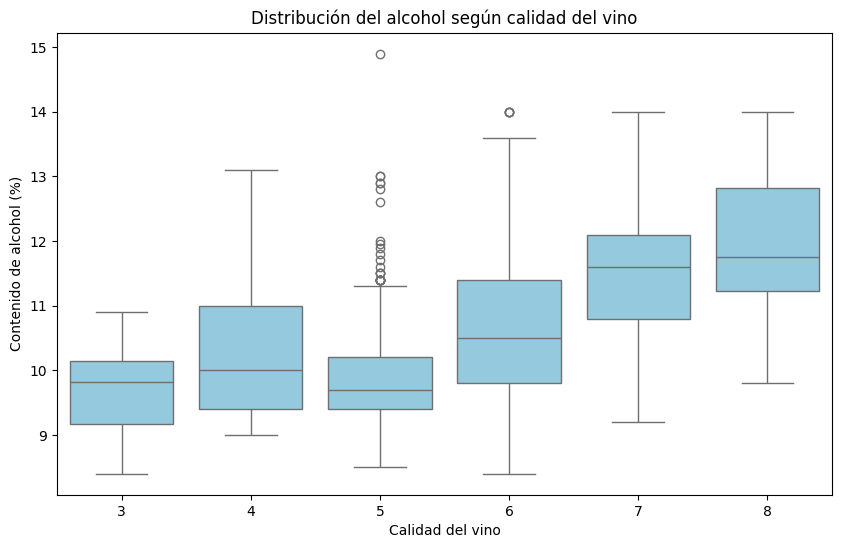

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de boxplot de alcohol según la calidad del vino
plt.figure(figsize=(10, 6))

# Queremos observar cómo varía el contenido de alcohol en función de la calidad percibida
# Este gráfico nos permitirá comparar la mediana y dispersión del alcohol dentro de cada nivel de calidad
sns.boxplot(x='quality', y='alcohol', data=df, color='skyblue')


plt.title('Distribución del alcohol según calidad del vino')
plt.xlabel('Calidad del vino')
plt.ylabel('Contenido de alcohol (%)')
plt.show()


El gráfico boxplot muestra la distribución del contenido de alcohol en función de la calidad del vino. A primera vista, se observa una **tendencia creciente**: a medida que aumenta la calidad del vino (de 3 a 8), también lo hace la mediana del contenido de alcohol.

- Los vinos con calidad **3, 4 y 5** tienen una mediana de alcohol que ronda los **10% o menos**, mientras que a partir de calidad **6** en adelante, las medianas superan esa marca.
- En particular, los vinos con calidad **8** presentan una mediana cercana al **12.5%**, lo que representa un aumento significativo respecto a los de menor puntuación.
- También se observa que el rango intercuartílico se amplía en los niveles de calidad más altos, indicando **más variabilidad en los vinos bien calificados**, lo cual puede reflejar diversidad en estilos o procesos de producción.
- Si bien hay outliers (especialmente en calidades intermedias), no distorsionan la tendencia general, que se mantiene ascendente.

Este análisis apoya la hipótesis planteada: **el contenido de alcohol parece estar positivamente relacionado con la calidad percibida del vino**. Desde un punto de vista enológico, esto podría explicarse por el impacto que el alcohol tiene en el cuerpo, la persistencia y la percepción general del producto.

### Hipótesis 2: ¿Los vinos con menor acidez volátil tienden a tener mejor calidad?

La variable `volatile acidity` representa la cantidad de ácidos volátiles presentes en el vino, principalmente ácido acético. Según el resumen estadístico, su media es 0.53, con valores que llegan hasta 1.58, lo cual es bastante elevado. En el análisis de boxplots se identificaron numerosos valores atípicos hacia la derecha, lo que indica que algunos vinos tienen una acidez volátil anormalmente alta.

En el mundo del vino, una alta acidez volátil suele relacionarse con defectos de elaboración o conservación. Por lo tanto, se plantea la siguiente hipótesis mencionada.

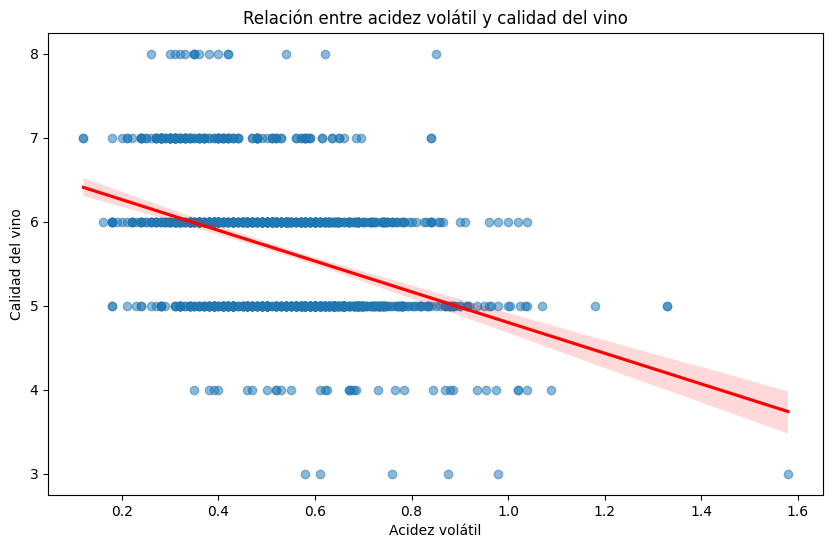

In [8]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión lineal
# Nos permite ver si existe una relación inversa entre acidez volátil y calidad
sns.regplot(x='volatile acidity', y='quality', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relación entre acidez volátil y calidad del vino')
plt.xlabel('Acidez volátil')
plt.ylabel('Calidad del vino')
plt.show()


Incorporando una línea de regresión al gráfico de dispersión, vemos como se evidencia una relación inversa entre la variable `volatile acidity` y la calidad del vino (`quality`). Se observa que, a medida que aumenta la acidez volátil, la calidad tiende a disminuir.

La línea de regresión presenta una **pendiente negativa**, lo cual respalda la hipótesis. Esto se alinea con el conocimiento enológico, ya que una acidez volátil elevada puede estar asociada a defectos de producción, oxidación o mala conservación, afectando negativamente el aroma y el sabor.

La dispersión de puntos también muestra que los vinos de baja calidad (3 a 5) presentan una mayor variabilidad en los niveles de acidez, mientras que los vinos de calidad más alta se concentran mayoritariamente en rangos bajos de `volatile acidity` (por debajo de 0.5).

Este patrón, junto con el análisis numérico previo y los outliers detectados en los boxplots, refuerza la idea de que la acidez volátil es una **variable clave a controlar** en la producción de vinos de mejor calidad.


### Hipótesis 3: ¿Los vinos con más sulfitos tienden a tener una calidad media-baja?

El dióxido de azufre total (`total sulfur dioxide`) es un conservante habitual en el vino. Si bien cumple funciones importantes, su exceso podría impactar negativamente en la experiencia sensorial, afectando el aroma y sabor del producto.

En el análisis estadístico y los boxplots previos, se identificaron valores de sulfitos totales que superan ampliamente los 200 mg/L, cuando el 75% de los casos no supera los 61 mg/L. Esto sugiere una fuerte dispersión en el uso de sulfitos.

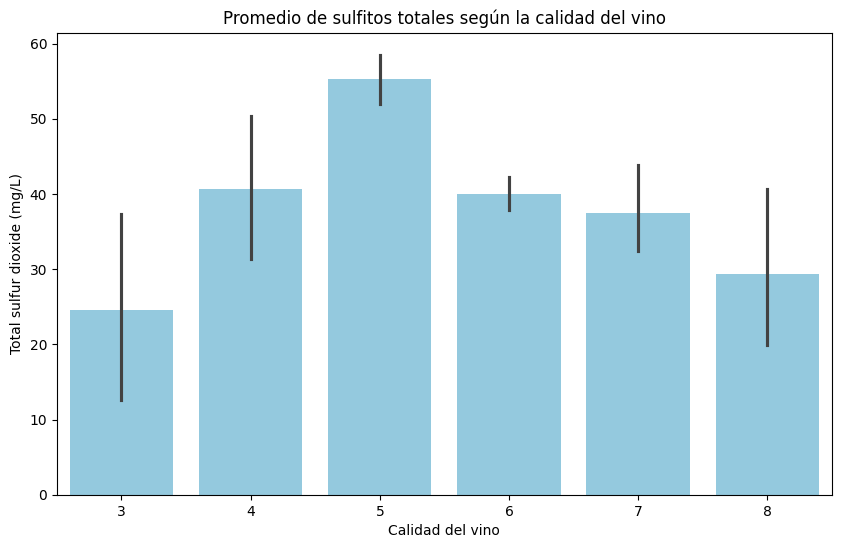

In [9]:
plt.figure(figsize=(10, 6))

# Gráfico de barras que muestra la media de sulfitos totales por nivel de calidad
# Útil para observar si los vinos mejor calificados usan menos sulfitos
sns.barplot(x='quality', y='total sulfur dioxide', data=df, color='skyblue')

plt.title('Promedio de sulfitos totales según la calidad del vino')
plt.xlabel('Calidad del vino')
plt.ylabel('Total sulfur dioxide (mg/L)')

plt.show()

In [10]:
#Veamos además la media por grupo

df.groupby('quality')['total sulfur dioxide'].mean()

,total sulfur dioxide
quality,
3,24.500000
4,40.606061
5,55.299172
6,39.941558
7,37.489510
8,29.375000


Se planteó la hipótesis de que los vinos con mayores niveles de dióxido de azufre total (`total sulfur dioxide`) serían aquellos con puntuaciones de calidad más bajas, ya que un exceso de sulfitos puede afectar negativamente el sabor y el aroma del vino.

El gráfico de barras muestra el promedio de sulfitos totales por nivel de calidad. Si bien los vinos con calificación **5** tienen el promedio más alto de sulfitos (alrededor de 55 mg/L), no se observa una tendencia lineal clara en los demás niveles. Por ejemplo, los vinos de calidad **4** tienen más sulfitos que los de calidad **3**, y los vinos de calidad **6 y 7** tienen niveles similares entre sí.

Llama la atención que los vinos de calidad **8** sí presentan niveles de sulfitos más bajos que los de calidad media, lo que puede sugerir que los mejores vinos tienden a usar menos conservantes. Sin embargo, el comportamiento no es uniforme en todos los grupos.

Por lo tanto, si bien hay indicios parciales que apoyan la hipótesis (especialmente en los extremos), **no puede afirmarse con contundencia** que exista una relación directa entre sulfitos y calidad percibida. Esto sugiere que el dióxido de azufre no es un factor determinante por sí solo, sino que probablemente interactúe con otras variables (como acidez, alcohol o técnica de elaboración) que también influyen en la evaluación sensorial del vino.


#### Hipótesis 4: ¿Los vinos con mayor calidad presentan simultáneamente mayor contenido de alcohol y mayor cantidad de sulfatos?

A partir de los análisis previos se identificó que tanto el contenido de alcohol como la cantidad de `sulphates` (sulfatos) podrían estar relacionados positivamente con la calidad del vino.

El alcohol aporta cuerpo y persistencia, mientras que los sulfitos, además de su función conservante, pueden influir en aspectos como el aroma y el sabor. En este caso, nos interesa explorar si ambos factores combinados se asocian con vinos de mayor calidad.

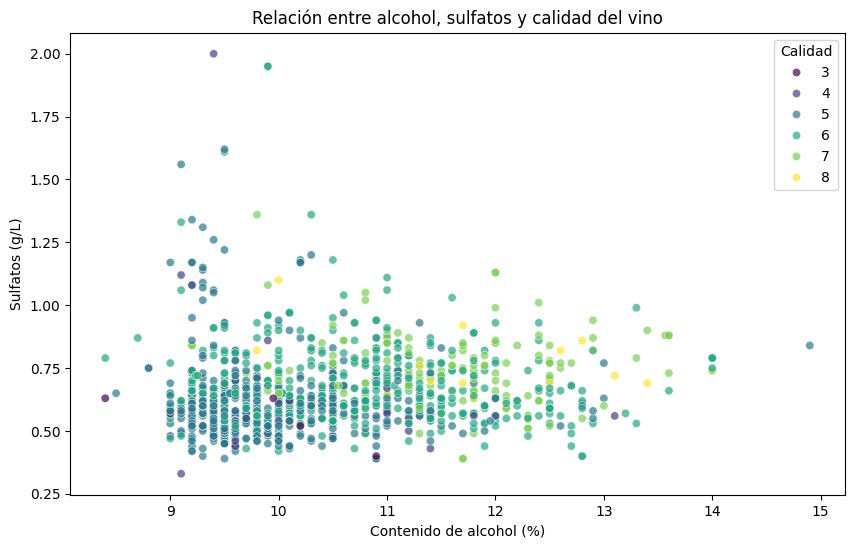

In [11]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión multivariado: alcohol vs sulphates, coloreado por calidad
# Queremos observar si los vinos de mayor calidad se agrupan en la zona de alto alcohol y alto contenido de sulfatos
sns.scatterplot(data=df, x='alcohol', y='sulphates', hue='quality', palette='viridis', alpha=0.7)

plt.title('Relación entre alcohol, sulfatos y calidad del vino')
plt.xlabel('Contenido de alcohol (%)')
plt.ylabel('Sulfatos (g/L)')
plt.legend(title='Calidad')
plt.show()


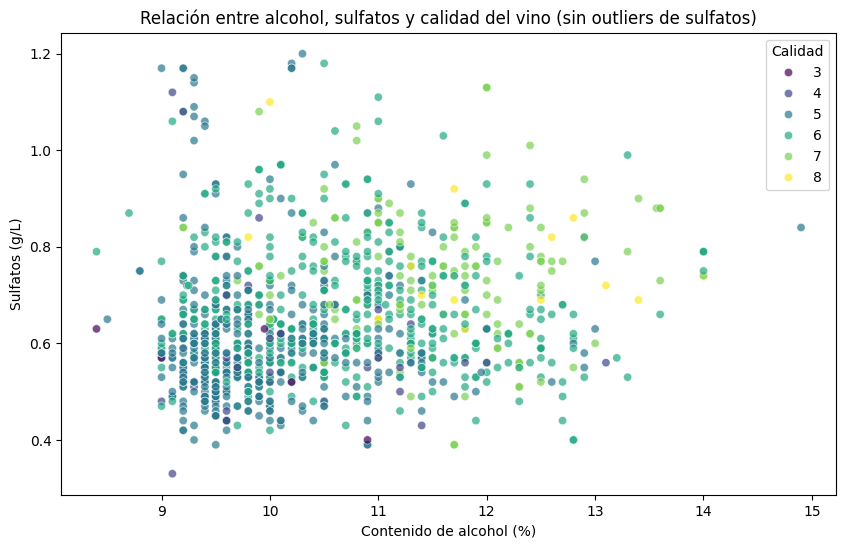

In [12]:
# Creamos una copia filtrada del dataset para visualizar sin outliers en sulphates
df_filtrado = df[(df['sulphates'] <= 1.2)]

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_filtrado, x='alcohol', y='sulphates', hue='quality', palette='viridis', alpha=0.7)

plt.title('Relación entre alcohol, sulfatos y calidad del vino (sin outliers de sulfatos)')
plt.xlabel('Contenido de alcohol (%)')
plt.ylabel('Sulfatos (g/L)')
plt.legend(title='Calidad')
plt.show()


Para facilitar la visualización de la concentración principal de observaciones (la "nube"), se eliminaron temporalmente del gráfico los vinos con niveles de `sulphates` mayores a 1.2 g/L, ya que representaban valores atípicos poco frecuentes que distorsionaban la escala del eje Y. Esta decisión se tomó únicamente con fines gráficos, sin eliminar datos del análisis general.

Con este recorte, se puede observar con mayor claridad la agrupación de vinos de calidad más alta (7 y 8) en la zona de alto alcohol y sulfatos moderadamente altos, lo que refuerza la hipótesis planteada.


En estos scatterplot multivariados vemos la relación entre el contenido de alcohol (`alcohol`), los niveles de sulfatos (`sulphates`) y la calidad del vino (`quality`). Cada punto representa un vino, posicionándose según su contenido de alcohol (eje X) y de sulfatos (eje Y), y coloreado por su nivel de calidad.

A simple vista, se puede observar que los vinos con **mayor calidad (7 y 8)** tienden a concentrarse en la parte **superior derecha del gráfico**, es decir, en zonas con **valores relativamente altos de alcohol y sulfatos**. Esta agrupación visual sugiere que ambos factores podrían estar asociados de manera conjunta con la calidad percibida.

En contraposición, los vinos con **calidad más baja (3 a 5)** están más distribuidos hacia la zona inferior izquierda, donde predominan niveles más bajos de alcohol y sulfatos. También se nota que la **densidad de puntos aumenta en la zona media**, lo cual es consistente con la mayoría de vinos del dataset teniendo calidad 5 o 6.

Si bien hay dispersión general (esperable en variables naturales), se valida parcialmente la hipótesis: los vinos de mayor calidad **no solo presentan más alcohol, sino que también tienden a tener más sulfatos**, aunque este último efecto es menos marcado.

Este análisis refuerza la importancia de observar múltiples variables al mismo tiempo, ya que el impacto combinado de alcohol y sulfatos parece más explicativo que si se los analizara por separado.


## Modelado supervisado: Clasificación de la calidad del vino


## Modelado supervisado: Clasificación de la calidad del vino

Luego de realizar el análisis exploratorio de datos y observar la distribución de la variable `quality`, se decidió abordar el problema como una tarea de **clasificación supervisada**.

In [13]:
#Traemos del dataset la cantidad de muestras para cada 'quality'

df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


Como vemos, la variable `quality` presenta valores enteros que van del 3 al 8, pero con una distribución desbalanceada: la mayoría de los vinos se agrupan en los valores 5, 6 y 7, mientras que las clases extremas (3, 4, 8) tienen muy pocas muestras. Esto hace que una clasificación multiclase directa pueda ser poco efectiva, debido a la falta de representatividad en ciertas clases.

Por esta razón, se optó por **agrupar la calidad en tres categorías**:
- `baja`: calificaciones de 3, 4 y 5
- `media`: calificación de 6
- `alta`: calificaciones de 7 y 8

La clase `baja` incluye los vinos calificados con 3, 4 y 5 puntos. Si bien el valor 5 se encuentra cerca del centro de la escala, se decidió mantenerlo dentro de la categoría baja por dos razones principales:

1. Desde una perspectiva sensorial, un vino calificado con 6 ya refleja un estándar aceptable de calidad, mientras que valores por debajo de 6 indican deficiencias.
2. A nivel estadístico, incorporar el valor 5 en la clase baja permite un mejor equilibrio entre las clases, garantizando que el modelo cuente con suficientes muestras para aprender patrones representativos en cada categoría.

Si bien existen métodos automáticos como `LabelEncoder` para convertir las clases categóricas en valores numéricos, este asigna los valores según el orden alfabético de las clases. Esto quiere decir que nos quedarían las clases como: `alta` = 0, `baja` = 1 y `media` = 2. Para que esto no suceda, y podamos interpretar mejor los resultados, se optó por realizar una codificación manual que respete el orden natural: `baja` = 0, `media` = 1 y `alta` = 2.

Esta transformación nos permitirá reducir el desbalance, facilitará el entrenamiento del modelo y mejorará la interpretabilidad de los resultados.


In [14]:
# Agrupamos calidad en 3 categorías: baja, media, alta
def clasificar_calidad(valor):
    if valor <= 5:
        return 'baja'
    elif valor == 6:
        return 'media'
    else:
        return 'alta'

# Creamos una nueva columna categórica
df['quality_cat'] = df['quality'].apply(clasificar_calidad)

# Visualizamos la cantidad de muestras por categoría
print(df['quality_cat'].value_counts())

# Codificación manual del orden lógico de las clases
orden_clases = {'baja': 0, 'media': 1, 'alta': 2}
df['quality_encoded'] = df['quality_cat'].map(orden_clases)

# Verificamos la codificación
df[['quality_cat', 'quality_encoded']].head()


quality_cat
baja     522
media    462
alta     159
Name: count, dtype: int64


,quality_cat,quality_encoded
0,baja,0
1,baja,0
2,baja,0
3,media,1
4,baja,0


In [15]:
# Ver una muestra aleatoria de 10 vinos
df[['quality_cat', 'quality_encoded']].sample(10)

,quality_cat,quality_encoded
1078,baja,0
73,baja,0
763,media,1
860,media,1
921,media,1
513,baja,0
502,baja,0
462,baja,0
716,media,1
662,media,1


### División del dataset en entrenamiento y prueba

Antes de entrenar el modelo, se divide el dataset en un conjunto de entrenamiento y otro de prueba, utilizando la función `train_test_split`. Esto permite evaluar el rendimiento del modelo de forma justa, ya que se testea sobre datos no vistos durante el entrenamiento.

Se utiliza el parámetro `stratify` para asegurar que el reparto de clases (baja, media, alta) se mantenga en ambas particiones. Utilizamos esta práctica especialmente para que las clases estén perfectamente balanceadas.

In [16]:
from sklearn.model_selection import train_test_split

# Variables predictoras (todas las columnas numéricas excepto las de calidad)
X = df.drop(columns=['quality', 'quality_cat', 'quality_encoded'])
y = df['quality_encoded']  # variable objetivo

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificamos la cantidad de muestras en cada grupo
print("Train set:", y_train.value_counts())
print("\nTest set:", y_test.value_counts())


Train set: quality_encoded
0    417
1    370
2    127
Name: count, dtype: int64

Test set: quality_encoded
0    105
1     92
2     32
Name: count, dtype: int64


### Selección de variables (Feature Selection)

En este paso, aplicaremos un proceso de selección de variables para reducir la dimensionalidad del dataset y quedarnos únicamente con aquellas características que aportan información relevante para la predicción de la variable objetivo (`quality_encoded`).

Utilizaremos el método `SelectKBest`, que evalúa individualmente cada variable predictora usando una prueba estadística (en este caso, ANOVA F-test, mediante `f_classif`) y seleccionaremos las K mejores en base a su puntuación.

Este enfoque nos permite:
- Reducir el riesgo de sobreajuste
- Mejorar la eficiencia del modelo
- Interpretar mejor qué variables tienen mayor poder predictivo

La selección se aplicará exclusivamente sobre el conjunto de entrenamiento para evitar "filtrar información" del conjunto de prueba (data leakage).

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Aplicamos SelectKBest sobre los datos de entrenamiento
# Elegimos K = 6 variables para empezar
selector = SelectKBest(score_func=f_classif, k=6)
selector.fit(X_train, y_train)

# Creamos un DataFrame con los scores de cada variable
scores = pd.DataFrame({
    'feature': X_train.columns,
    'score': selector.scores_
}).sort_values(by='score', ascending=False)

# Mostramos las 6 variables seleccionadas
print("Variables seleccionadas:")
print(scores.head(6))

# Filtramos X_train y X_test para quedarnos solo con las mejores features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Guardamos los nombres de las columnas seleccionadas
selected_features = selector.get_feature_names_out(input_features=X_train.columns)


Variables seleccionadas:
                 feature       score
10               alcohol  166.771479
1       volatile acidity   81.580772
2            citric acid   47.967362
9              sulphates   34.104153
6   total sulfur dioxide   30.749096
0          fixed acidity   12.603297


### Resultados del Feature Selection

Al aplicar `SelectKBest` con el test estadístico ANOVA (`f_classif`), se identificaron las variables con mayor poder explicativo respecto a la variable objetivo (`quality_encoded`). Las seis variables con mejores puntuaciones fueron:

- `alcohol`
- `volatile acidity`
- `citric acid`
- `sulphates`
- `total sulfur dioxide`
- `fixed acidity`

Es importante destacar que este test valida lo que ya vimos en nuestro Análisis Exploratorio, donde pudimos observar que el alcohol y la acidez están muy relacionadas con la calidad del vino.

Estas características serán utilizadas como variables predictoras para el modelo de clasificación. Al reducir la dimensionalidad, buscaremos mejorar la eficiencia y evitar que variables poco informativas introduzcan ruido o lleven al modelo a sobreajustarse.


### Entrenamiento del modelo: Árbol de Decisión

Como algoritmo de clasificación, se seleccionó un Árbol de Decisión. Esta elección se basó en varios factores:

- Fue uno de los modelos vistos en el curso.
- No requiere escalado de variables ni grandes preprocesamientos.
- Permite interpretar fácilmente las decisiones tomadas (visualización del árbol).
- Tolera relaciones no lineales y funciona bien con datasets de tamaño moderado.

El entrenamiento se realizará sobre las seis variables seleccionadas previamente con `SelectKBest`, utilizando el conjunto de entrenamiento. Luego, se evaluará el rendimiento del modelo sobre el conjunto de prueba.


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamos el árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Predicciones sobre el set de prueba
y_pred = model.predict(X_test_selected)

## Evaluación del modelo

### 1. Métricas

Accuracy del modelo: 0.63

Reporte de clasificación:
              precision    recall  f1-score   support

        baja       0.71      0.70      0.71       105
       media       0.57      0.59      0.58        92
        alta       0.53      0.50      0.52        32

    accuracy                           0.63       229
   macro avg       0.60      0.60      0.60       229
weighted avg       0.63      0.63      0.63       229



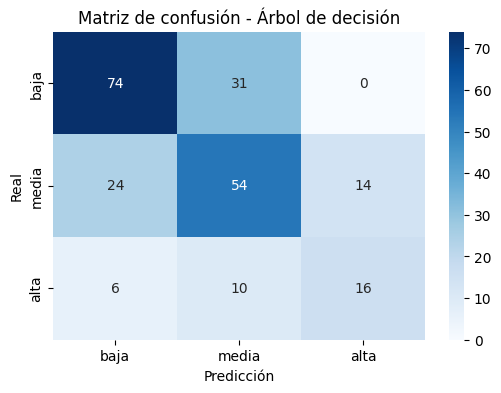

In [19]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['baja', 'media', 'alta']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización de la matriz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', xticklabels=['baja', 'media', 'alta'], yticklabels=['baja', 'media', 'alta'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Árbol de decisión")
plt.show()


### 2. Análisis de los resultados

El Árbol de Decisión entrenado alcanzó un accuracy general del 63% sobre el conjunto de prueba. Este valor indica un rendimiento aceptable para una primera aproximación sin hiperparámetros ajustados ni técnicas de ensamble.

El desempeño fue mejor en la clase `baja` (F1 = 0.71), probablemente debido a su mayor representación en el dataset. Las clases `media` y `alta`, con menos muestras, presentaron mayor confusión, especialmente entre sí.

La matriz de confusión muestra que el modelo tiende a acertar cuando la calidad es claramente baja, pero le cuesta más distinguir entre media y alta. Esto podría deberse a la subjetividad implícita en la calificación de los vinos, o a que las variables seleccionadas no capturan con suficiente claridad los matices entre calidades medias y altas.

Este resultado establece una buena base para futuros ajustes, como la optimización de hiperparámetros, la exploración de modelos de ensamble o la inclusión de técnicas de balanceo de clases.

### 3. Visualizaciones adicionales

#### (a) Visualización del Árbol de Decisión

Con el objetivo de comprender cómo el modelo toma decisiones, se incluye la visualización del Árbol de Decisión completo entrenado. Esta estructura jerárquica permite interpretar qué variables utiliza el modelo en los primeros niveles, cómo separa las observaciones y qué reglas establece para clasificar la calidad del vino.

La visualización ayuda a reforzar la transparencia del modelo, al mostrar explícitamente qué combinaciones de características conducen a una predicción específica.


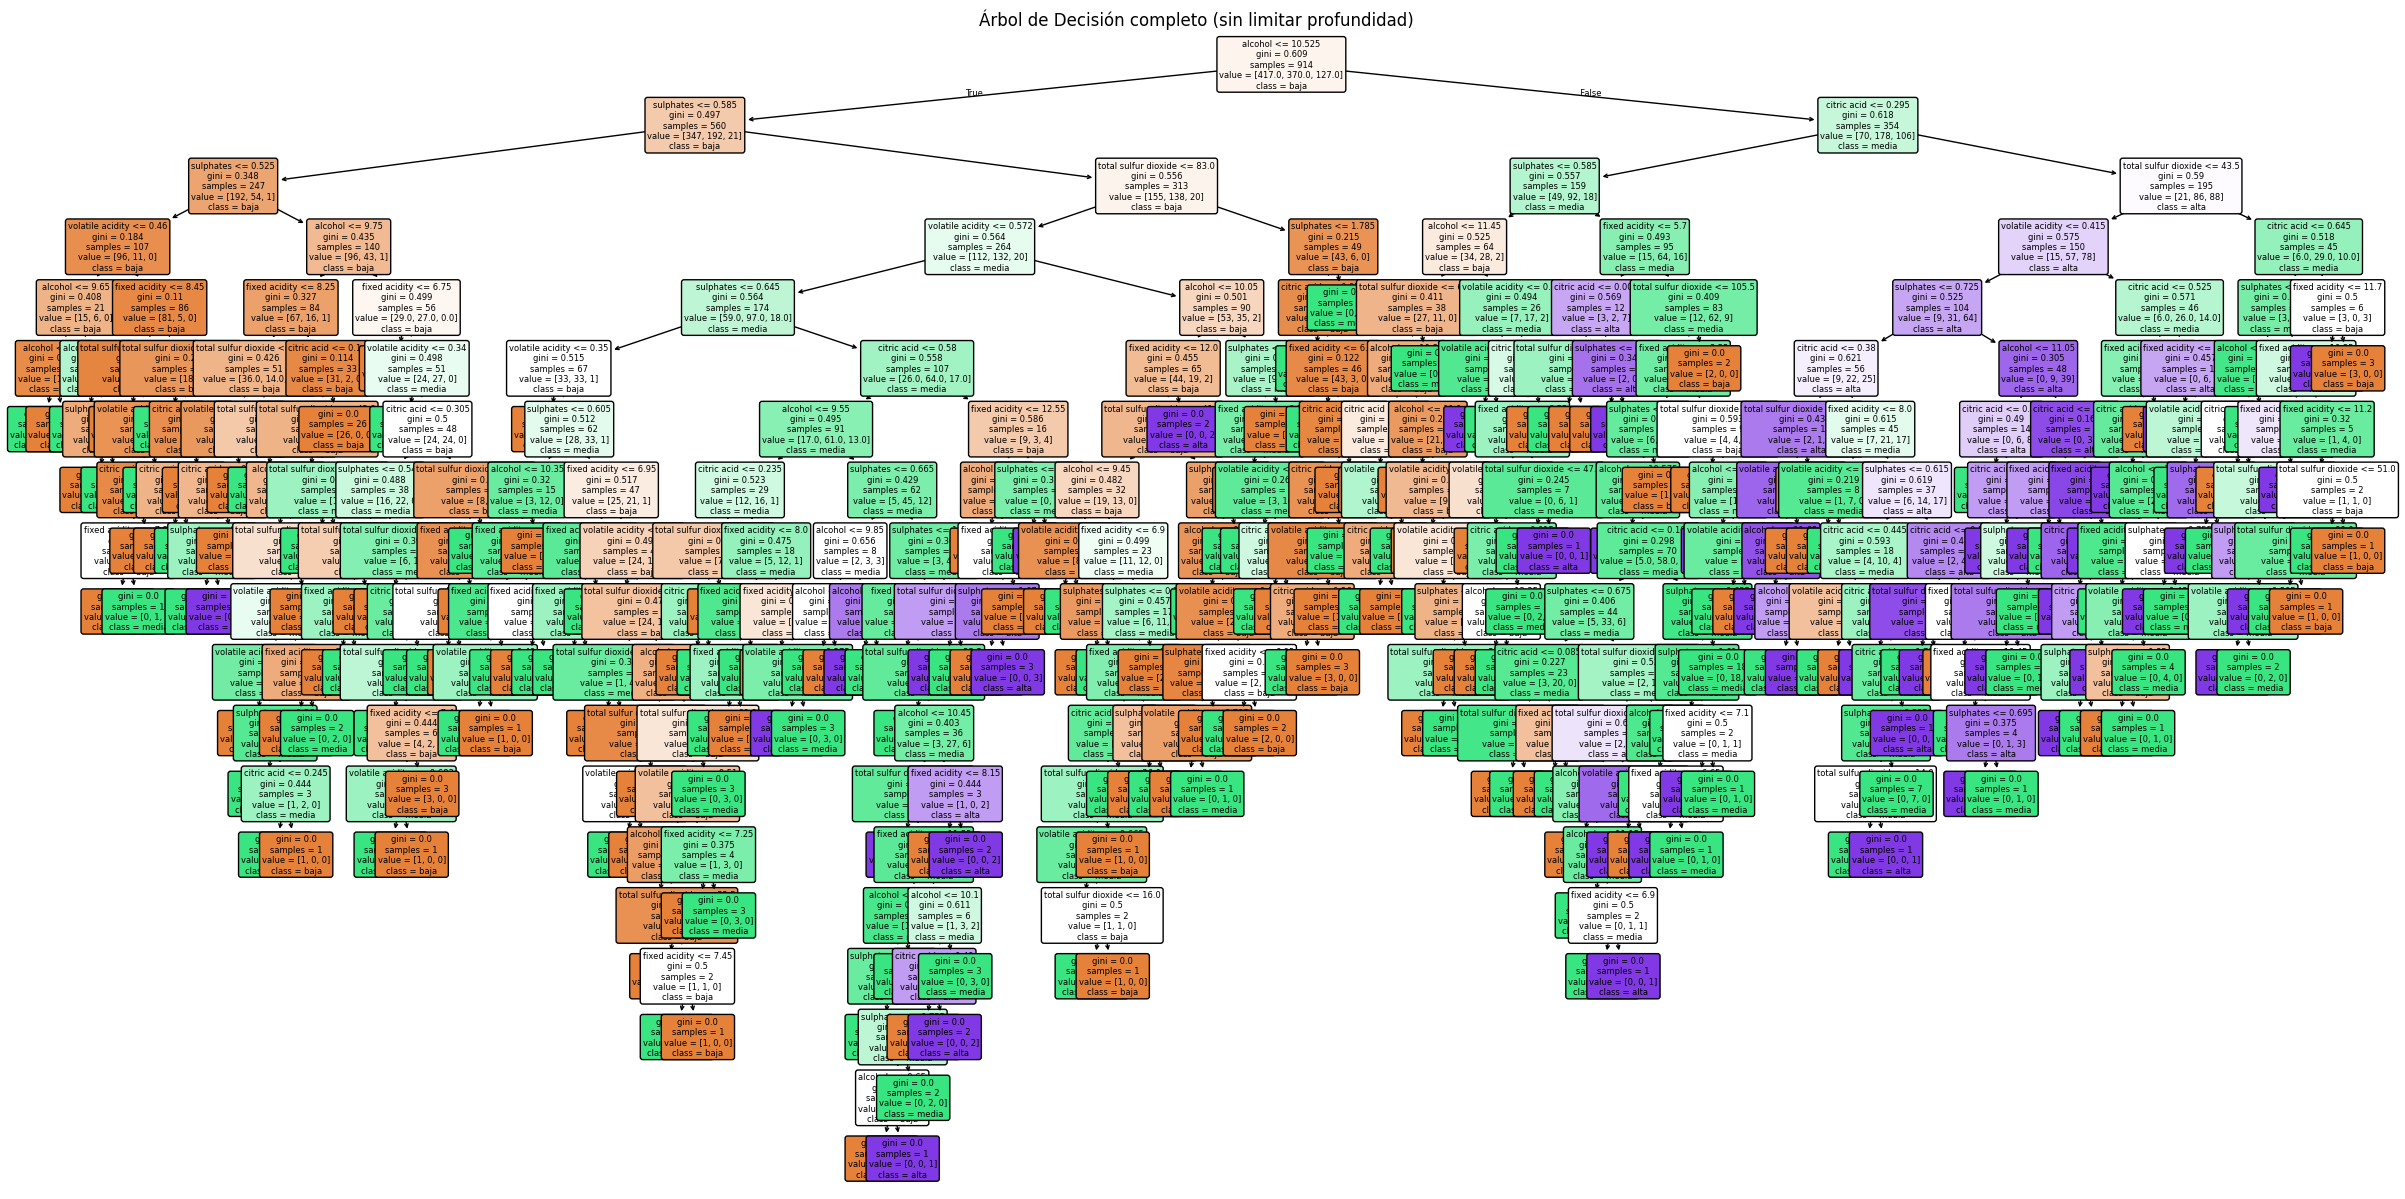

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Creamos la figura
plt.figure(figsize=(30, 15))
plot_tree(
    model,
    feature_names=selected_features,
    class_names=['baja', 'media', 'alta'],
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title("Árbol de Decisión completo (sin limitar profundidad)")
plt.show()

La visualización completa del árbol muestra todas las bifurcaciones que el modelo generó durante el entrenamiento. Sin embargo, dada la complejidad del árbol (derivada de su profundidad y la cantidad de observaciones), esta representación se vuelve ilegible.

Para mejorar la comprensión, se generará una visualización restringida a los primeros 4 niveles del árbol. Es importante aclarar que **esta restricción es solo visual**: el modelo fue entrenado con profundidad completa, y por lo tanto mantiene su rendimiento intacto.

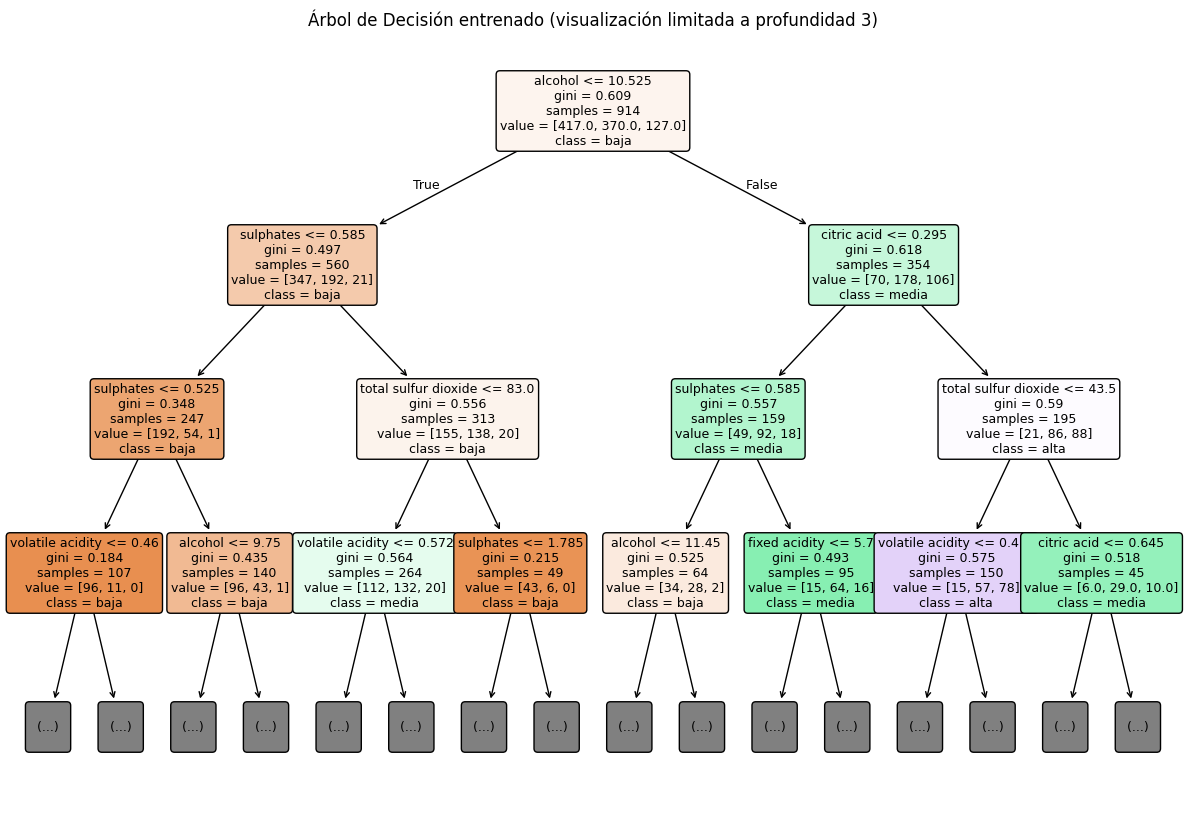

In [31]:
plt.figure(figsize=(15, 10))
plot_tree(
    model,
    feature_names=selected_features,
    class_names=['baja', 'media', 'alta'],
    filled=True,
    rounded=True,
    fontsize=9,
    max_depth=3  # Mostramos solo los primeros 3 nveles del árbol
)
plt.title("Árbol de Decisión entrenado (visualización limitada a profundidad 3)")
plt.show()

#### Análisis: Arbol de decisión (visualización hasta profundidad 3)

Esta visualización muestra únicamente los primeros tres niveles del Árbol de Decisión entrenado, sin alterar la estructura real del modelo (que fue entrenado con profundidad completa). El objetivo es facilitar la interpretación de las decisiones iniciales del algoritmo, sin limitar la profundidad de desiciones y, como consecuencia, la presición del modelo.

Se observa que:

- **La primera división** del árbol se basa en el contenido de `alcohol`, siendo la variable más influyente en el modelo. Vinos con menos de 10.525% de alcohol tienden a ser clasificados como `baja` calidad.

- El lado izquierdo del árbol (alcohol bajo) deriva principalmente hacia la clase `baja`, mientras que el derecho (alcohol más alto) permite una diferenciación más rica entre `media` y `alta`, dependiendo del nivel de ácidos y sulfitos.

- También se puede observar cómo el modelo tiende a dividir fuertemente en base a **sulphates** y luego refina con otras variables como **volatile acidity** o **citric acid**, según el camino.

Este gráfico, aunque limitado visualmente, aporta información clave sobre la lógica interna del modelo y permite comprender por qué ciertas predicciones pueden estar sesgadas hacia una clase.


#### (b) Gráfico de dispersión de tres dimensiones

Como complemento al análisis cuantitativo, se incluye un gráfico de dispersión tridimensional para visualizar cómo se distribuyen los vinos en función de tres de sus variables más influyentes: `alcohol`, `volatile acidity` y `sulphates`.

Estas variables fueron seleccionadas por su relevancia estadística en el análisis de `SelectKBest`, y también porque mostraron fuerte asociación con la variable objetivo durante el análisis exploratorio.

La visualización permite observar si existen patrones o agrupamientos naturales que ayuden a entender por qué el modelo toma ciertas decisiones. Además, ofrece una perspectiva espacial sobre las clases, evidenciando el solapamiento entre categorías y las dificultades inherentes a la tarea de clasificación.

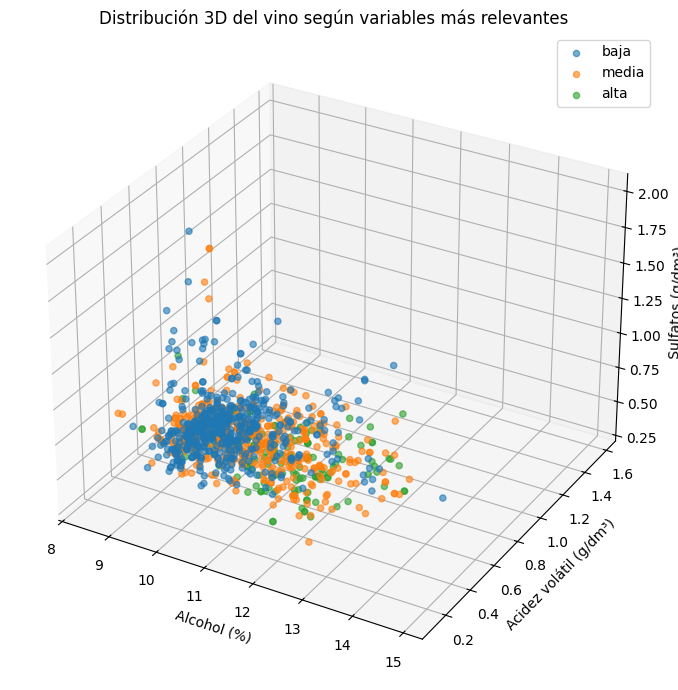

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Variables más relevantes
x = df['alcohol']
y = df['volatile acidity']
z = df['sulphates']
c = df['quality_encoded']

# Mapa de colores (azul=baja, naranja=media, verde=alta)
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['baja', 'media', 'alta']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D con color por clase
for i in range(3):
    ax.scatter(
        x[c == i],
        y[c == i],
        z[c == i],
        label=labels[i],
        alpha=0.6,
        color=colors[i]
    )

ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Acidez volátil (g/dm³)")
ax.set_zlabel("Sulfatos (g/dm³)")
ax.set_title("Distribución 3D del vino según variables más relevantes")
ax.legend()
plt.tight_layout()
plt.show()

#### Análisis: Gráfico de dispersión de tres dimensiones

El gráfico muestra una nube de puntos que representa los vinos distribuidos en función del contenido de alcohol, acidez volátil y sulfatos, coloreados según la calidad categorizada (`baja`, `media`, `alta`).

Se observa una **zona de fuerte concentración** alrededor de los valores intermedios de alcohol (entre 8% y 11%) y acidez volátil (alrededor de 1.0), donde coinciden vinos de todas las calidades. Esto sugiere que no existen fronteras claras y simples entre clases, lo que explica por qué el modelo tuvo cierto grado de confusión, especialmente entre las categorías `media` y `alta`.

Sin embargo, se identifican **agrupamientos más definidos** hacia los extremos del eje de alcohol, donde los vinos con valores más altos tienden a estar asociados a una calidad más alta (verde), mientras que aquellos con menor alcohol y mayor acidez volátil se vinculan más con la clase `baja` (azul).

Este tipo de visualización no solo complementa el análisis numérico y el rendimiento del modelo, sino que también permite entender la **distribución real de los datos** y las **limitaciones inherentes a la tarea de clasificación**.


# Conclusiones del proyecto

Durante este proyecto se trabajó con un dataset de vinos que contiene variables físico-químicas como `alcohol`, `acidez volátil`, `sulfatos` y otras, con el objetivo de predecir la calidad del vino en tres categorías: `baja`, `media` y `alta`.

### Hipótesis exploradas

A lo largo del análisis se evaluaron distintas hipótesis como:
- ¿Existe una relación directa entre el contenido de alcohol y la calidad del vino?
- ¿A menor acidez volátil, aumenta la calidad?
- ¿Los niveles de sulfitos influyen en la percepción de calidad?
- ¿La combinación de variables como alcohol y sulfatos mejora la capacidad predictiva?

Estas hipótesis fueron exploradas mediante gráficos específicos (boxplots, dispersión y análisis multivariado), y se validaron parcialmente, especialmente en los casos de `alcohol` y `acidez volátil`, que mostraron relaciones notorias con la calidad.

### Hallazgos

- El contenido de alcohol fue la variable con mayor poder predictivo.
- La acidez volátil mostró una relación inversa con la calidad.
- Las clases `baja` y `media` son más fácilmente distinguibles que `media` y `alta`.
- No existe una frontera simple entre las clases, lo que dificulta la clasificación perfecta.
- El modelo de Árbol de Decisión alcanzó un accuracy del 63%, con buen desempeño en la clase `baja`, pero dificultades para diferenciar `media` y `alta`.

### Reflexiones finales

Este proyecto demostró cómo es posible aplicar herramientas de ciencia de datos para resolver un problema de clasificación real, combinando análisis exploratorio, visualizaciones, selección de variables y entrenamiento de modelos supervisados.

El Árbol de Decisión utilizado permitió interpretar fácilmente las decisiones del modelo, aunque su rendimiento se vio limitado por el solapamiento natural entre clases y el tamaño reducido del dataset.
